In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

In [3]:
df_rent = pd.read_csv('House_Rent_Dataset.csv')

In [4]:
df_rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df_rent.shape

(4746, 12)

In [6]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Summary

- Dataset contains 4746 entries and 12 variables.
- Both numerical and categorical datatypes are present.
- Numerical datatype is int64.
- Categorical datatype is float64.
- Rent is the target variable.
- No missing values.
- Treat Rent and Size as numerical features.

In [7]:
df_rent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df_rent.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


## Univariate Analysis

Text(0.5, 1.0, 'Distribution of Rent')

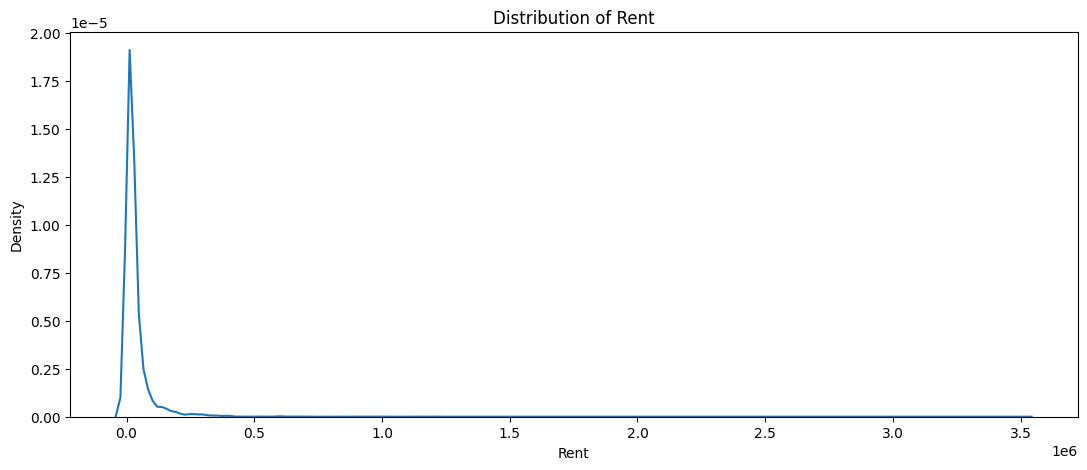

In [9]:
# Visualizing the distribution of target variable Rent
plt.rcParams['figure.figsize'] = [13,5]
sns.kdeplot(df_rent['Rent'])
plt.title('Distribution of Rent')

Text(0.5, 1.0, 'Distribution of Size')

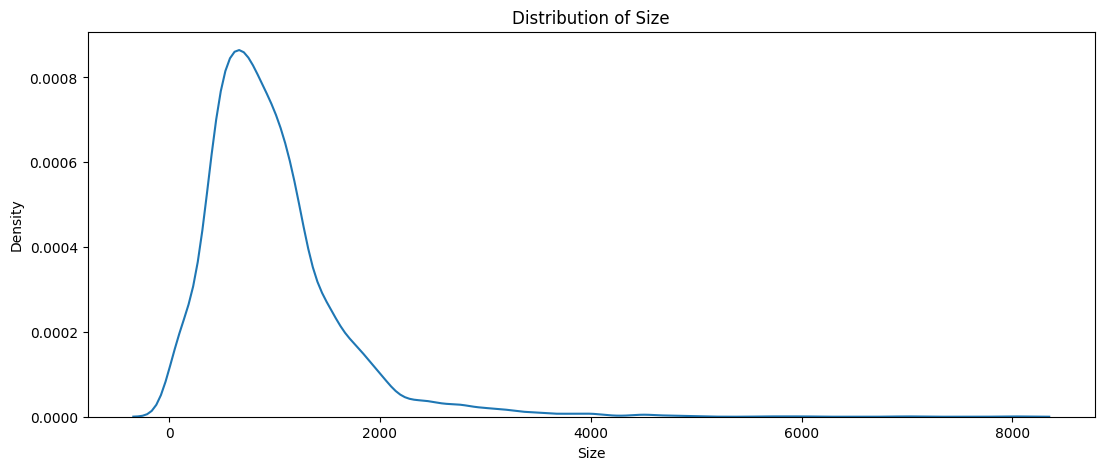

In [10]:
# Visualizing the distribution of target variable Rent
plt.rcParams['figure.figsize'] = [13,5]
sns.kdeplot(df_rent['Size'])
plt.title('Distribution of Size')

#### Insights :

- Rent of most of the houses are mostly less than 0.25M
- This maybe because owners with higher luxurious houses are not posting on portal.
- Most of the houses that listed are moderate in size.

Text(0.5, 1.0, 'Boxplot of Rent')

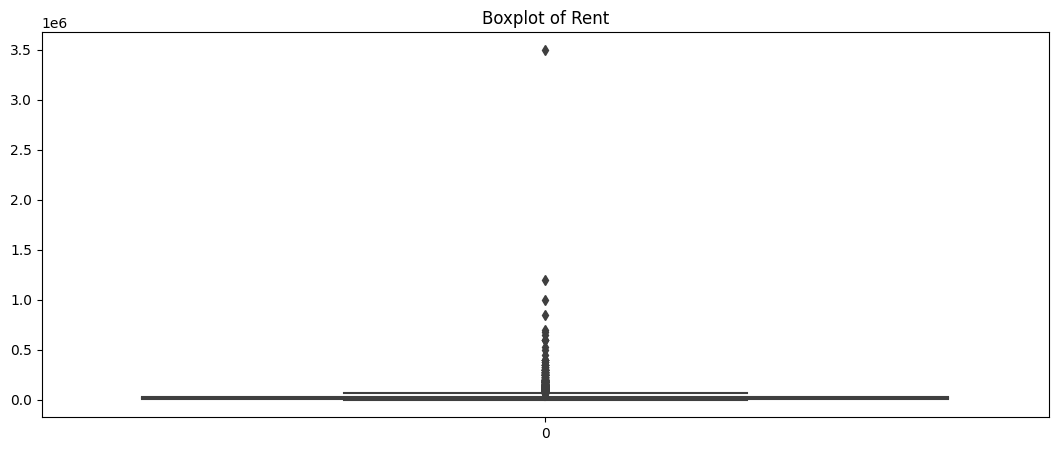

In [11]:
# Boxplot of target variable Rent
plt.rcParams['figure.figsize'] = [13,5]
sns.boxplot(df_rent['Rent'])
plt.title('Boxplot of Rent')

Text(0.5, 1.0, 'Boxplot of Size')

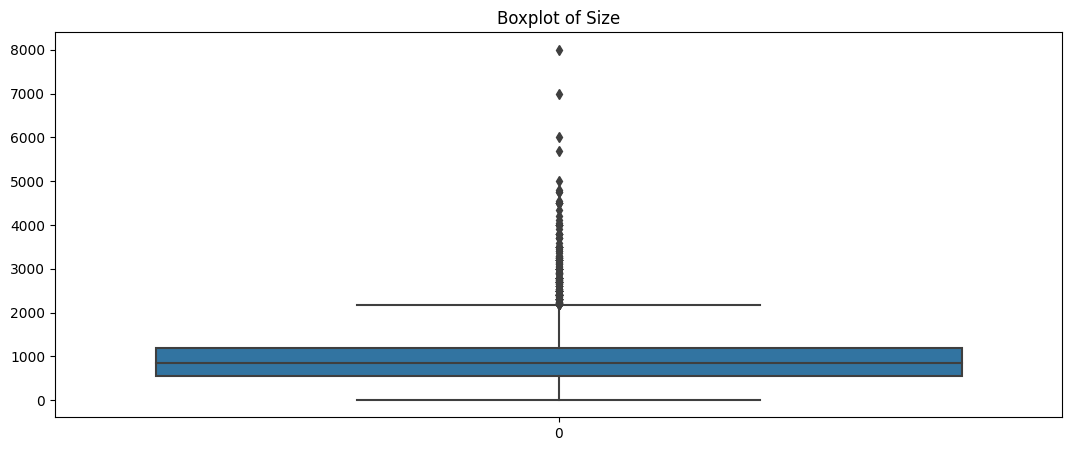

In [12]:
# Boxplot of size
plt.rcParams['figure.figsize'] = [13,5]
sns.boxplot(df_rent['Size'])
plt.title('Boxplot of Size')

In [13]:
df_rent['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [14]:
df_rent[df_rent["Area Locality"] == "Marathahalli"]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1655,2022-07-04,2,32900,1200,3 out of 6,Carpet Area,Marathahalli,Bangalore,Furnished,Bachelors/Family,1,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1892,2022-05-23,2,18000,600,Ground out of 2,Super Area,Marathahalli,Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
2059,2022-06-20,1,18000,550,3 out of 6,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Agent
2086,2022-05-23,2,10000,500,Upper Basement out of 4,Carpet Area,Marathahalli,Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner


#### Insights:

- There are large number of outliers present in the Rent feature
- In Rent feature, we can clearly see that in same area the rent is increased by 10x times when the size increases 2x times. Therefore, this data point has to be deleted by considering a special outlier case in order to prevent machine learning model from being confused.
    

In [15]:
df_rent.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [16]:
colm_for_count = ['BHK', 'Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']

<AxesSubplot: xlabel='Point of Contact', ylabel='count'>

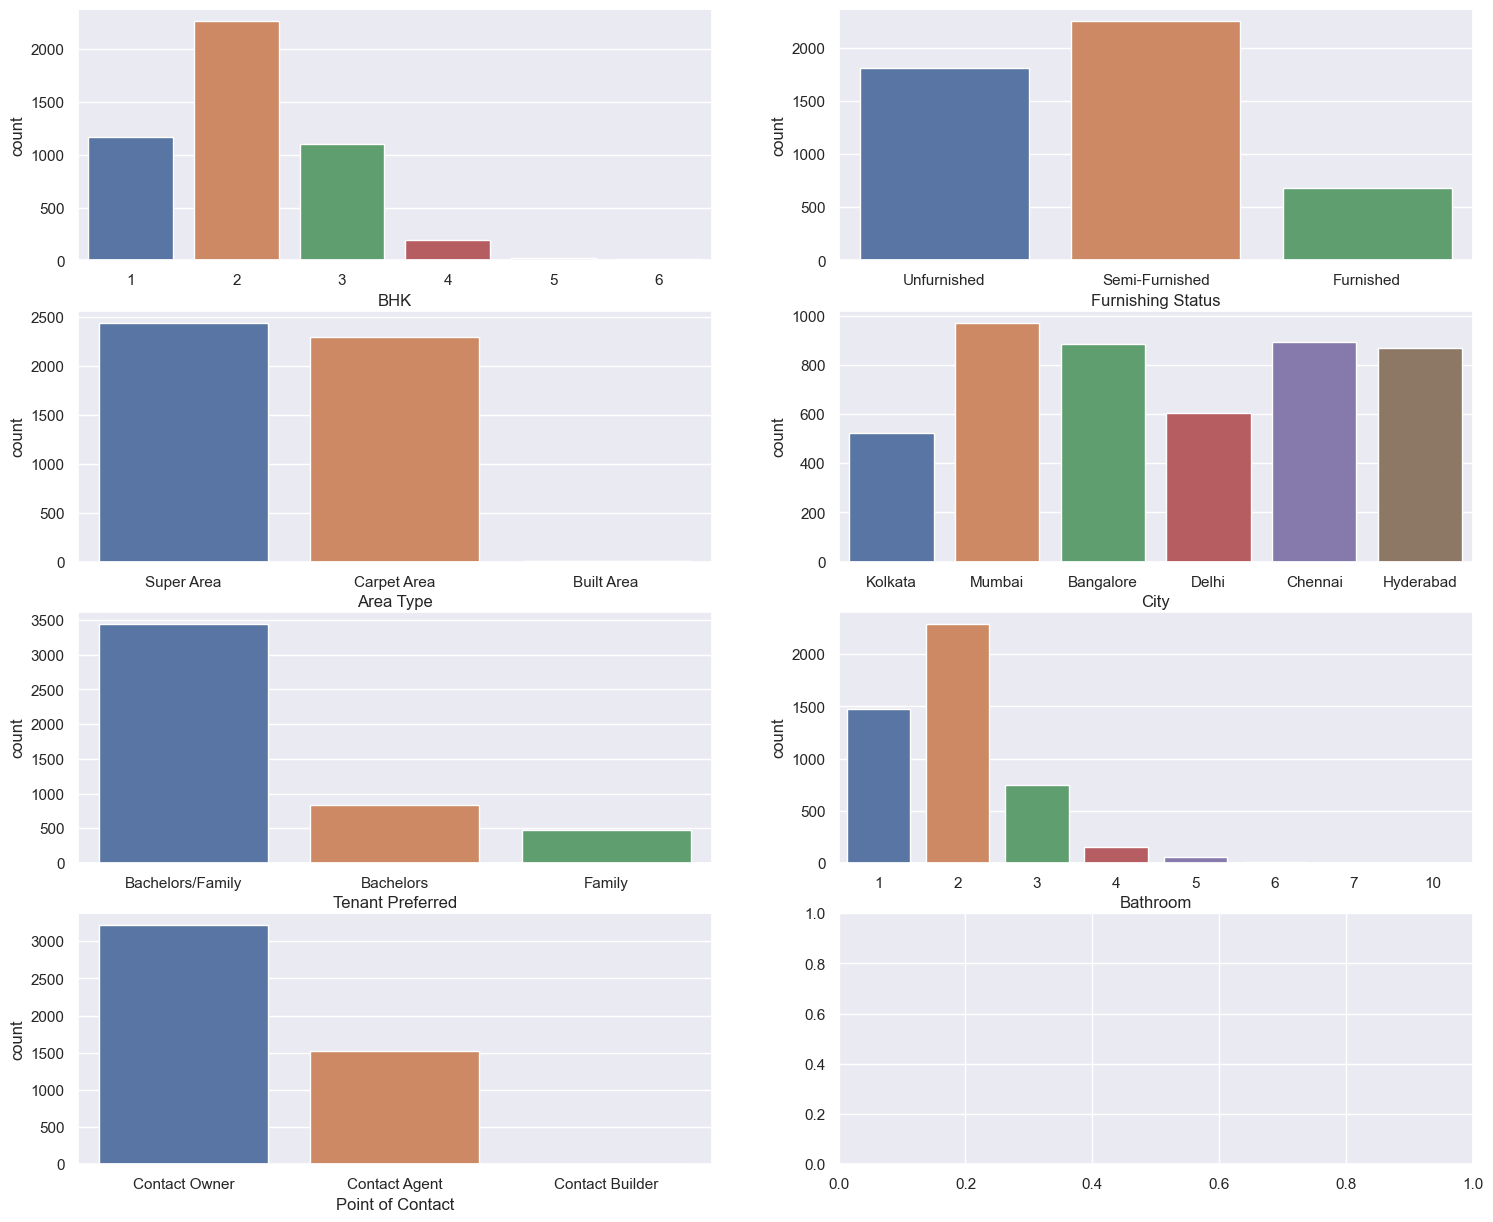

In [17]:
# Count plot 
sns.set()
plt.rcParams['figure.figsize'] = [18,15]
#define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(4, 2)

sns.countplot(data=df_rent, x='BHK',  ax=axes[0,0])
sns.countplot(data=df_rent, x='Furnishing Status',  ax=axes[0,1])
sns.countplot(data=df_rent, x='Area Type', ax=axes[1,0])
sns.countplot(data=df_rent, x='City', ax=axes[1,1])
sns.countplot(data=df_rent, x='Tenant Preferred', ax=axes[2,0])
sns.countplot(data=df_rent, x='Bathroom', ax=axes[2,1])
sns.countplot(data=df_rent, x='Point of Contact', ax=axes[3,0])


#### insights :

- BHK : Most of the houses for rent are 2 BHK. There is a huge class imbalance.
- Furnishing Status : It can be interpreted that people usually give out a unfurnished or semi furnished house.
- It is evident that most houses are built upon calculation from Super Area or Carpet Area. Built Area is a scarcely category in this case.  
- The dataset consists of metro cities of India with Kolkata containing almost half as number of instances.
- The owners who listed their homes are preffered tenant as Bachelors/Family. 
- Its is evident that the plot is postively skewed. As luxury increases, listing decreases.
-  Most of the poeple prefer Contact owner as preferred mode of contact. This feature also has imbalance in instances. Contact Builder is so rarely available as usually less number of builders themselves prefer listing houses for rent on such websites.

### Bivariate Analysis

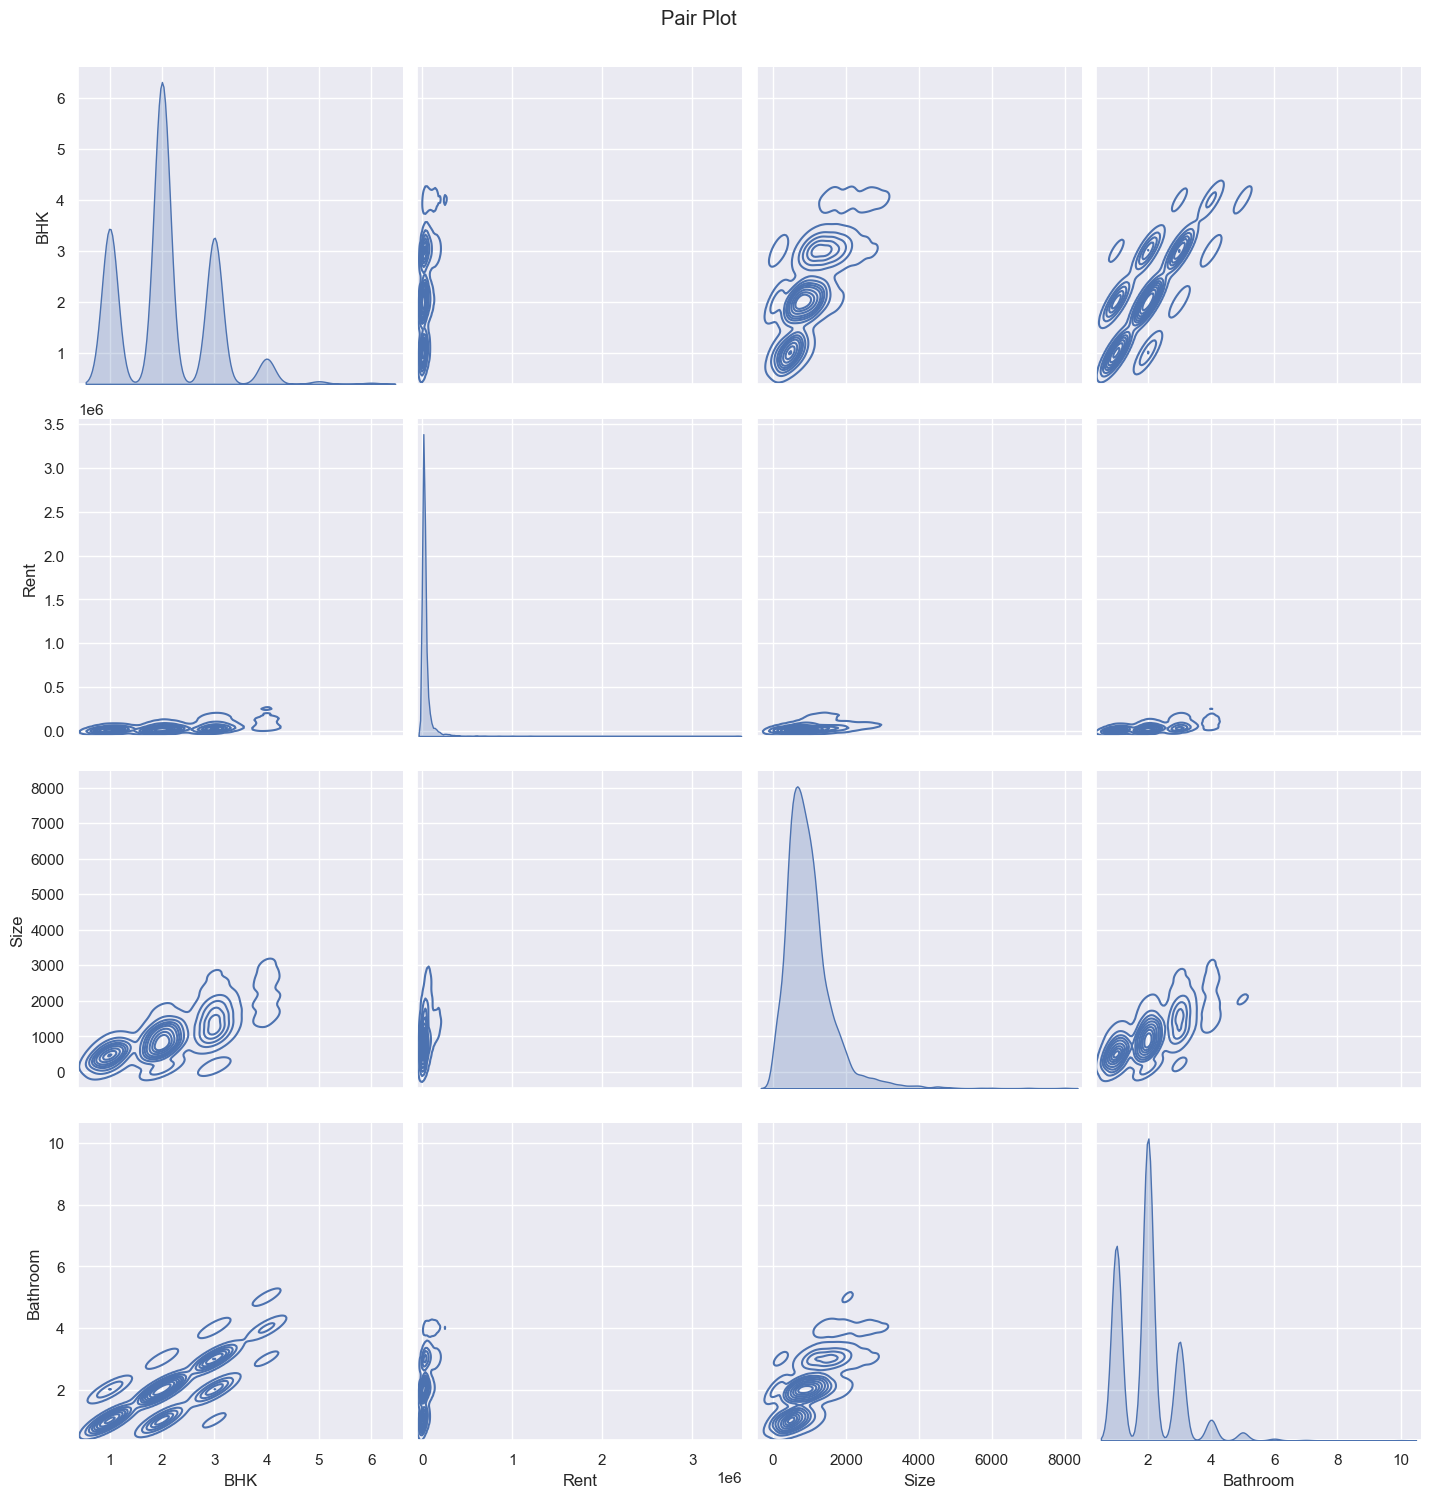

In [18]:
pairplot = sns.pairplot(data=df_rent, kind="kde")
pairplot.fig.set_size_inches(15, 15)
pairplot.fig.suptitle("Pair Plot", y=1.02)
plt.show()

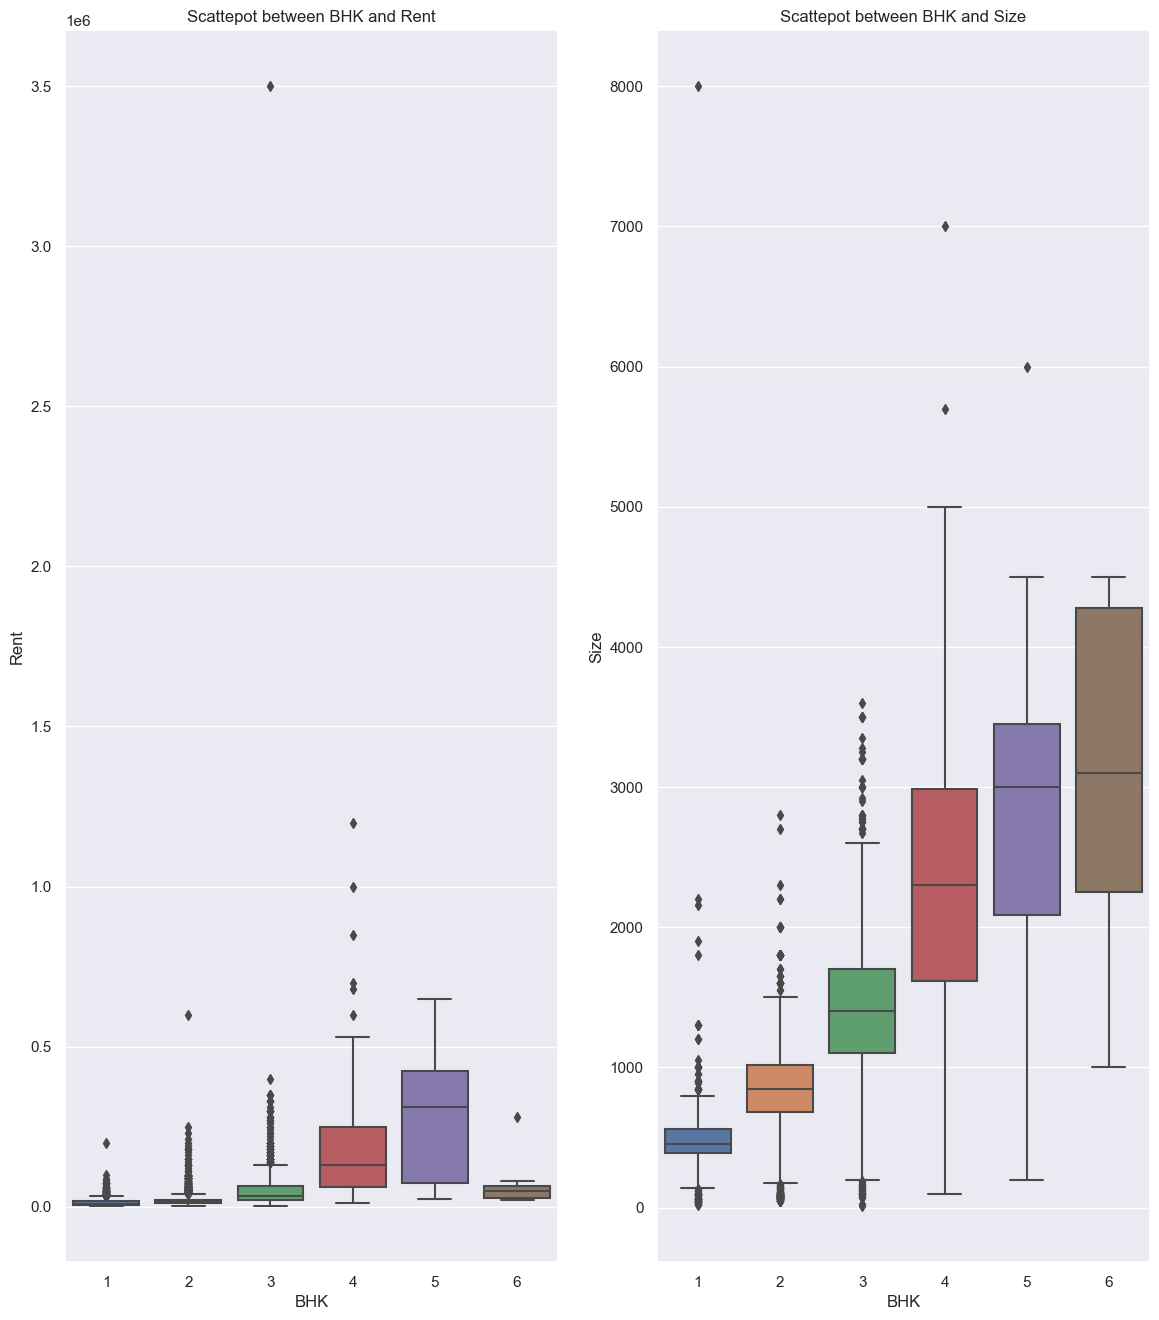

In [22]:
# Relationship between BHK and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'BHK', y = 'Rent', data = df_rent)
plt.title('Scattepot between BHK and Rent')


# Relationship between BHK and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'BHK', y = 'Size', data = df_rent)
plt.title('Scattepot between BHK and Size')

plt.show()

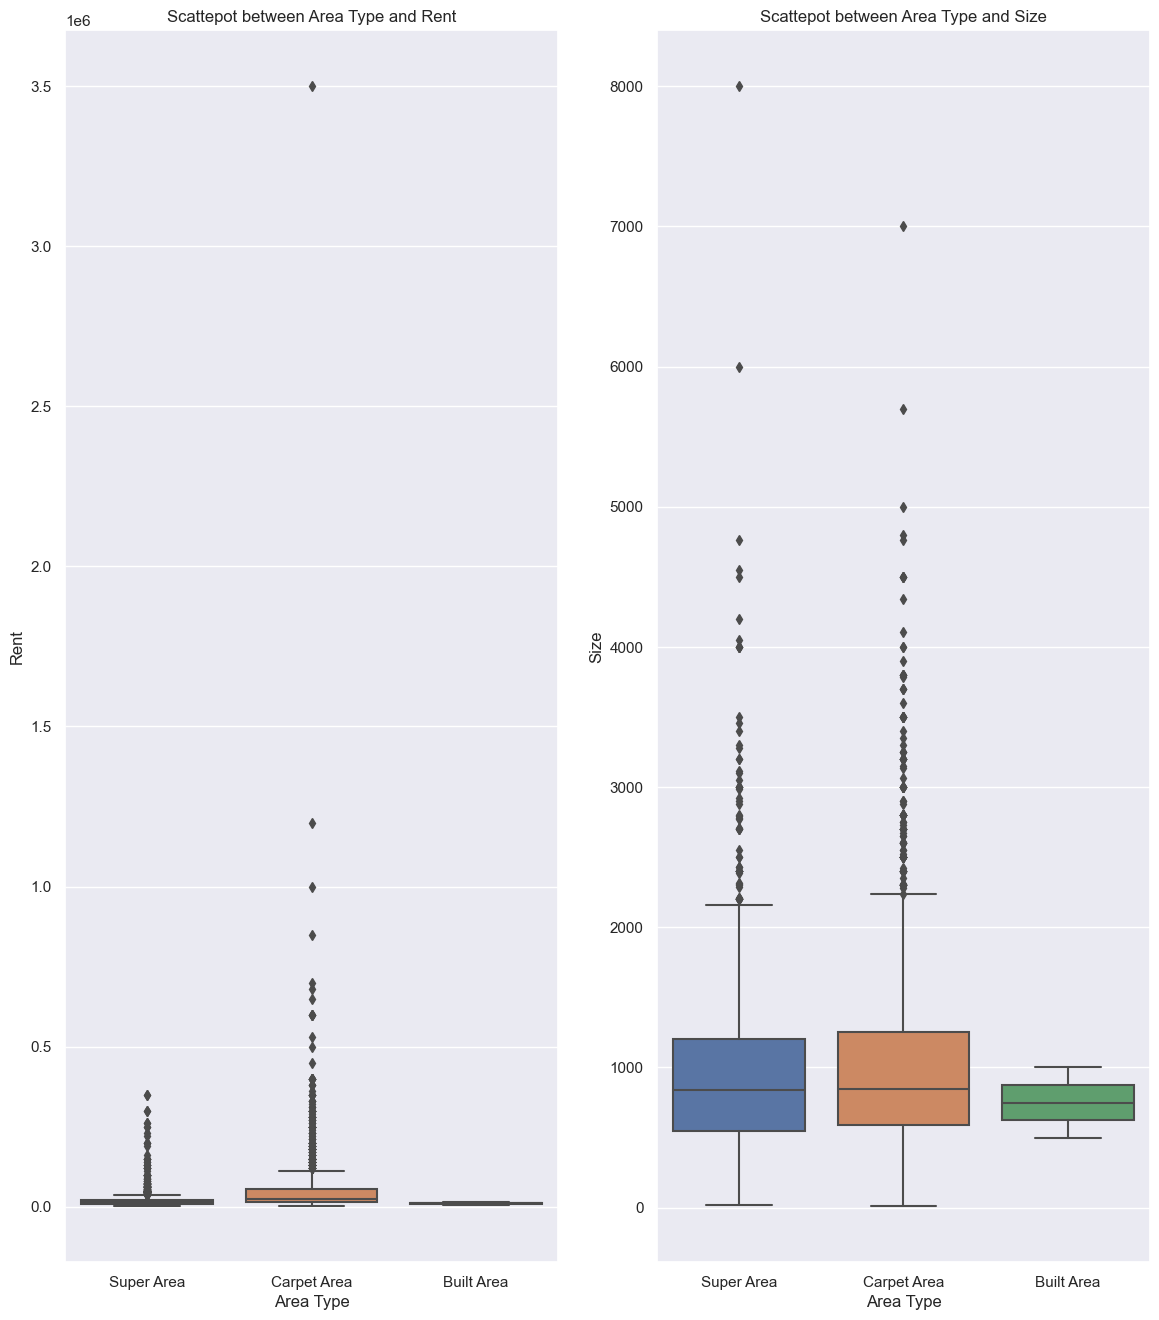

In [24]:
# Relationship between Area Type and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'Area Type', y = 'Rent', data = df_rent)
plt.title('Scattepot between Area Type and Rent')


# Relationship between Area Type and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'Area Type', y = 'Size', data = df_rent)
plt.title('Scattepot between Area Type and Size')

plt.show()

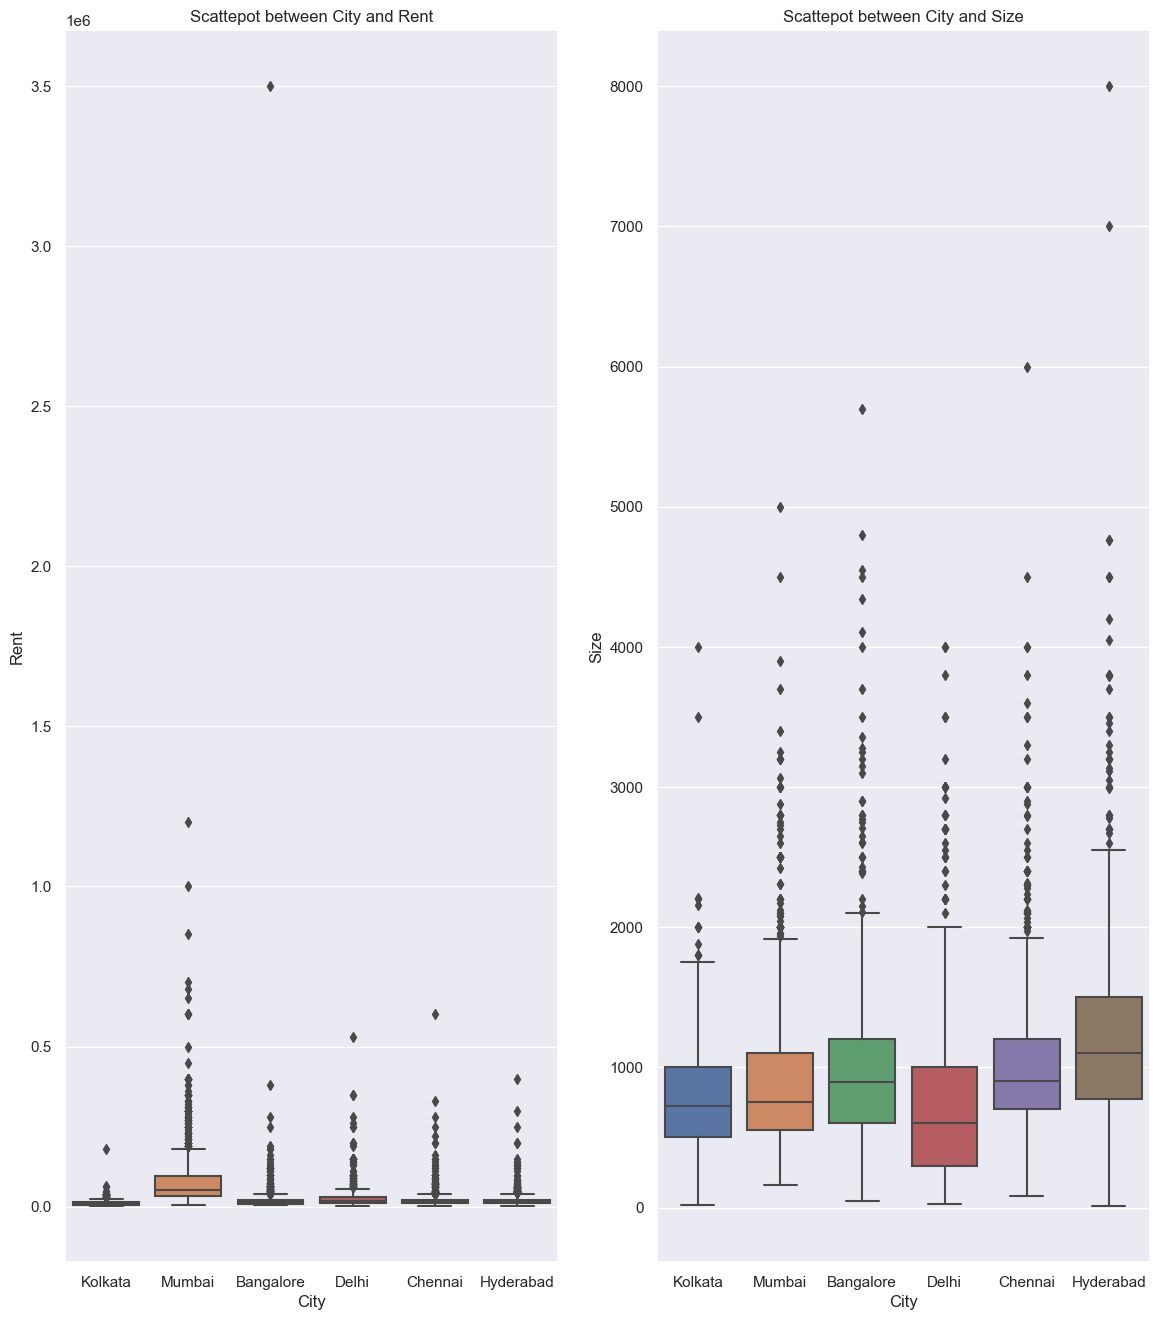

In [25]:
# Relationship between City and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'City', y = 'Rent', data = df_rent)
plt.title('Scattepot between City and Rent')


# Relationship between City and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'City', y = 'Size', data = df_rent)
plt.title('Scattepot between City and Size')

plt.show()

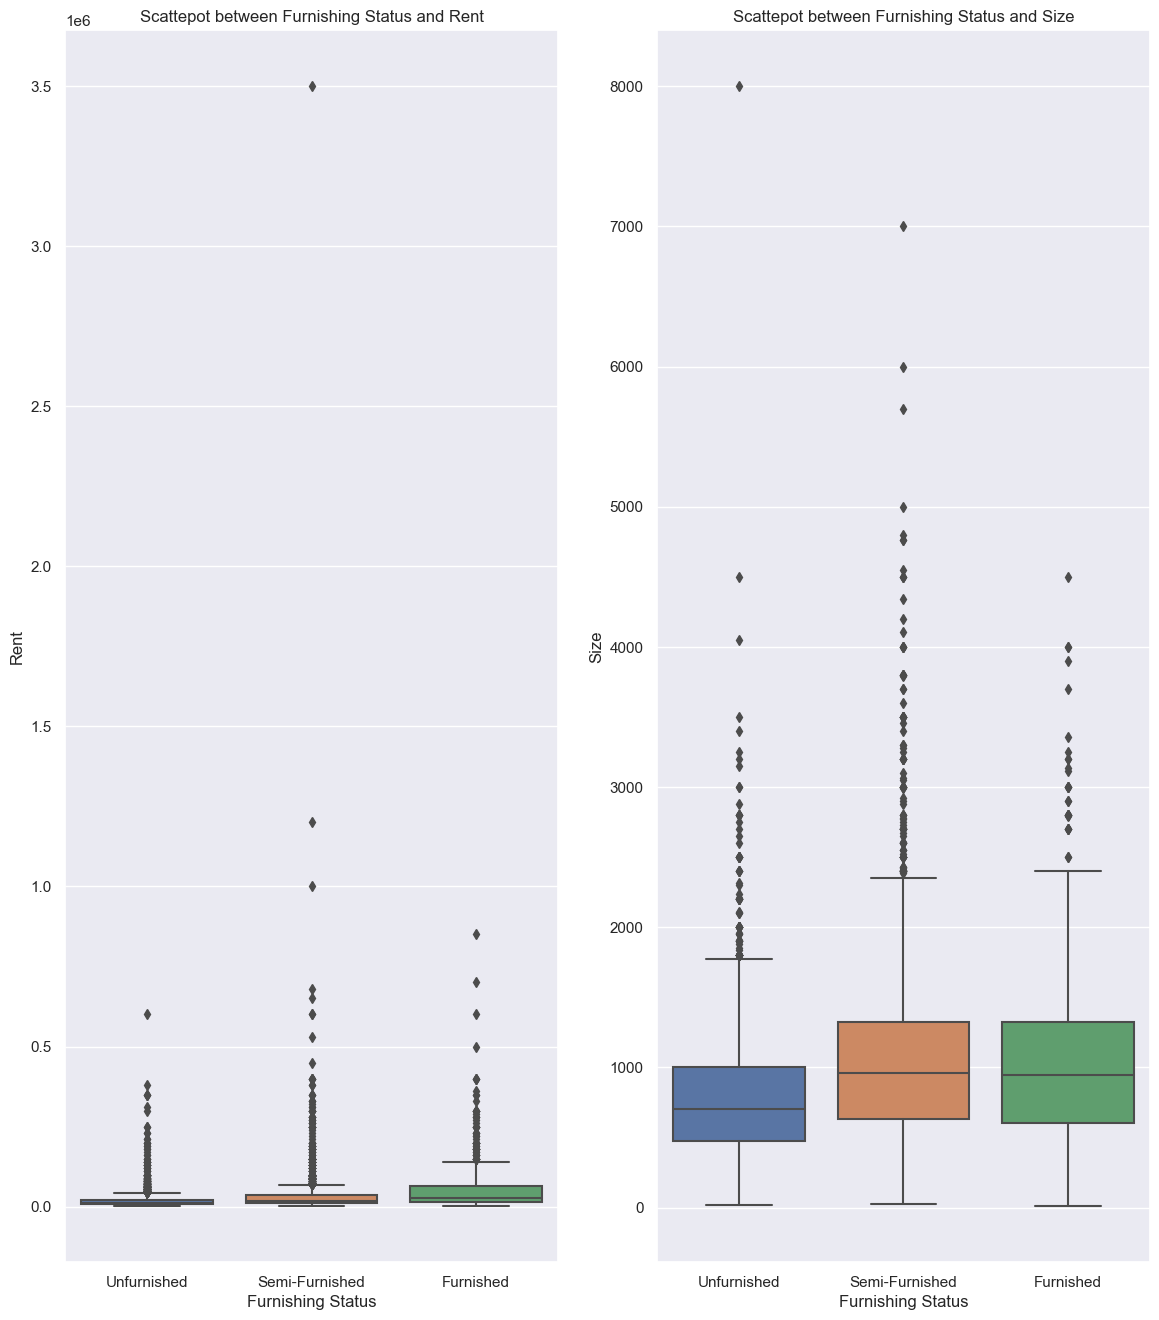

In [26]:
# Relationship between Furnishing Status and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'Furnishing Status', y = 'Rent', data = df_rent)
plt.title('Scattepot between Furnishing Status and Rent')


# Relationship between Furnishing Status and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'Furnishing Status', y = 'Size', data = df_rent)
plt.title('Scattepot between Furnishing Status and Size')

plt.show()

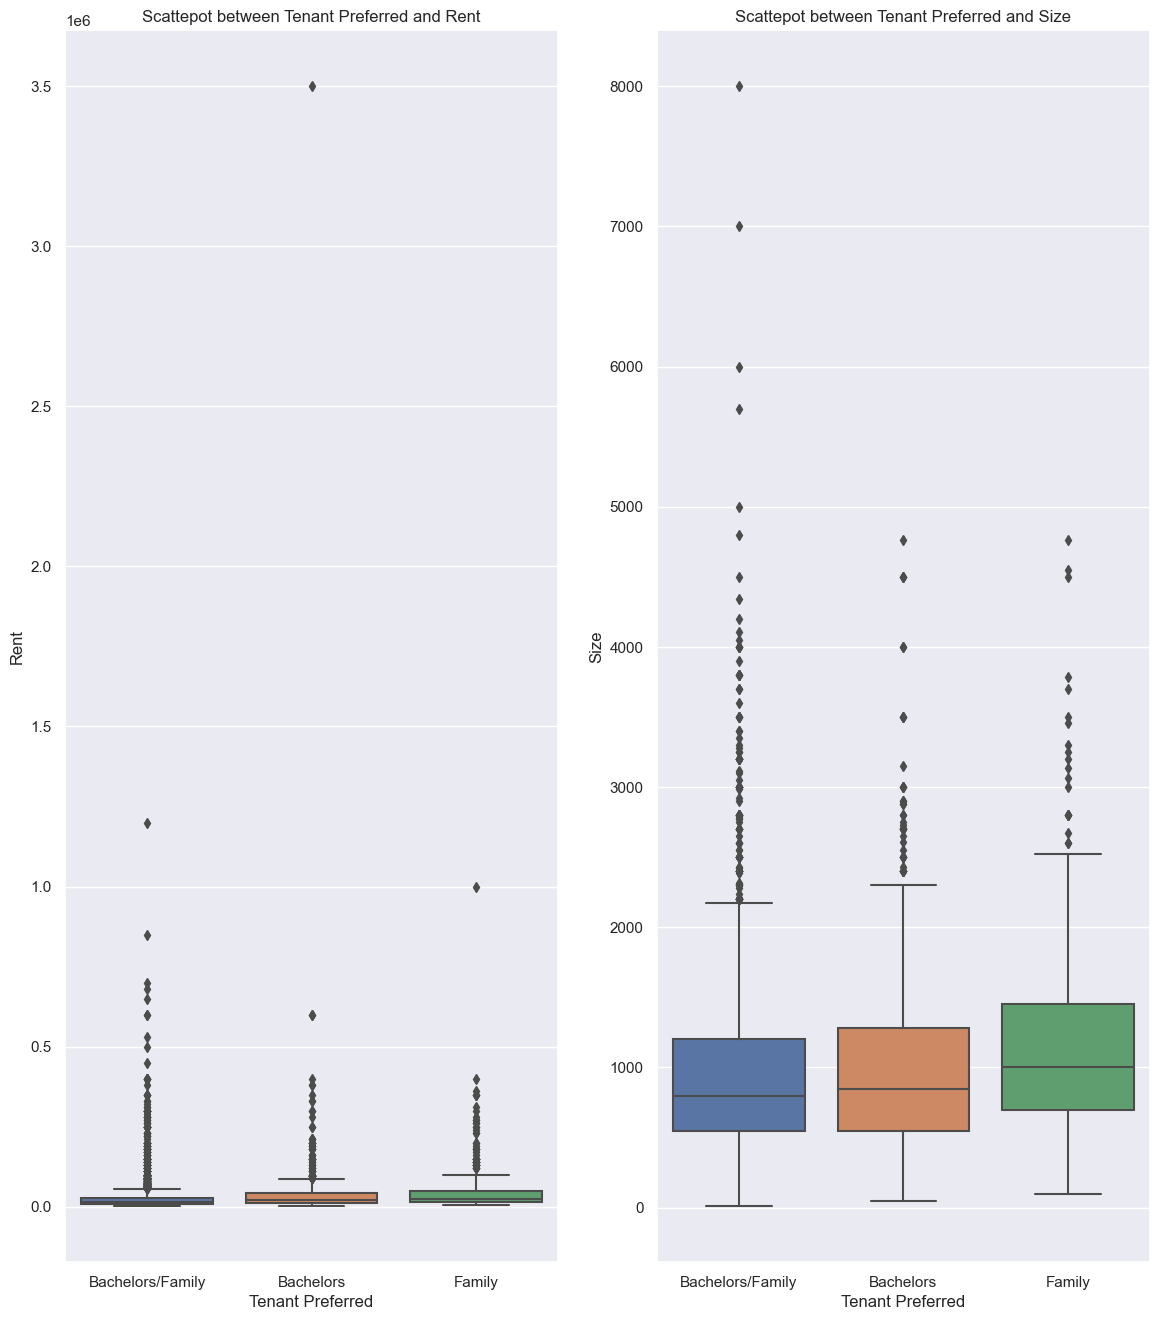

In [27]:
# Relationship between Tenant Preferred and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'Tenant Preferred', y = 'Rent', data = df_rent)
plt.title('Scattepot between Tenant Preferred and Rent')


# Relationship between Tenant Preferred and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'Tenant Preferred', y = 'Size', data = df_rent)
plt.title('Scattepot between Tenant Preferred and Size')

plt.show()

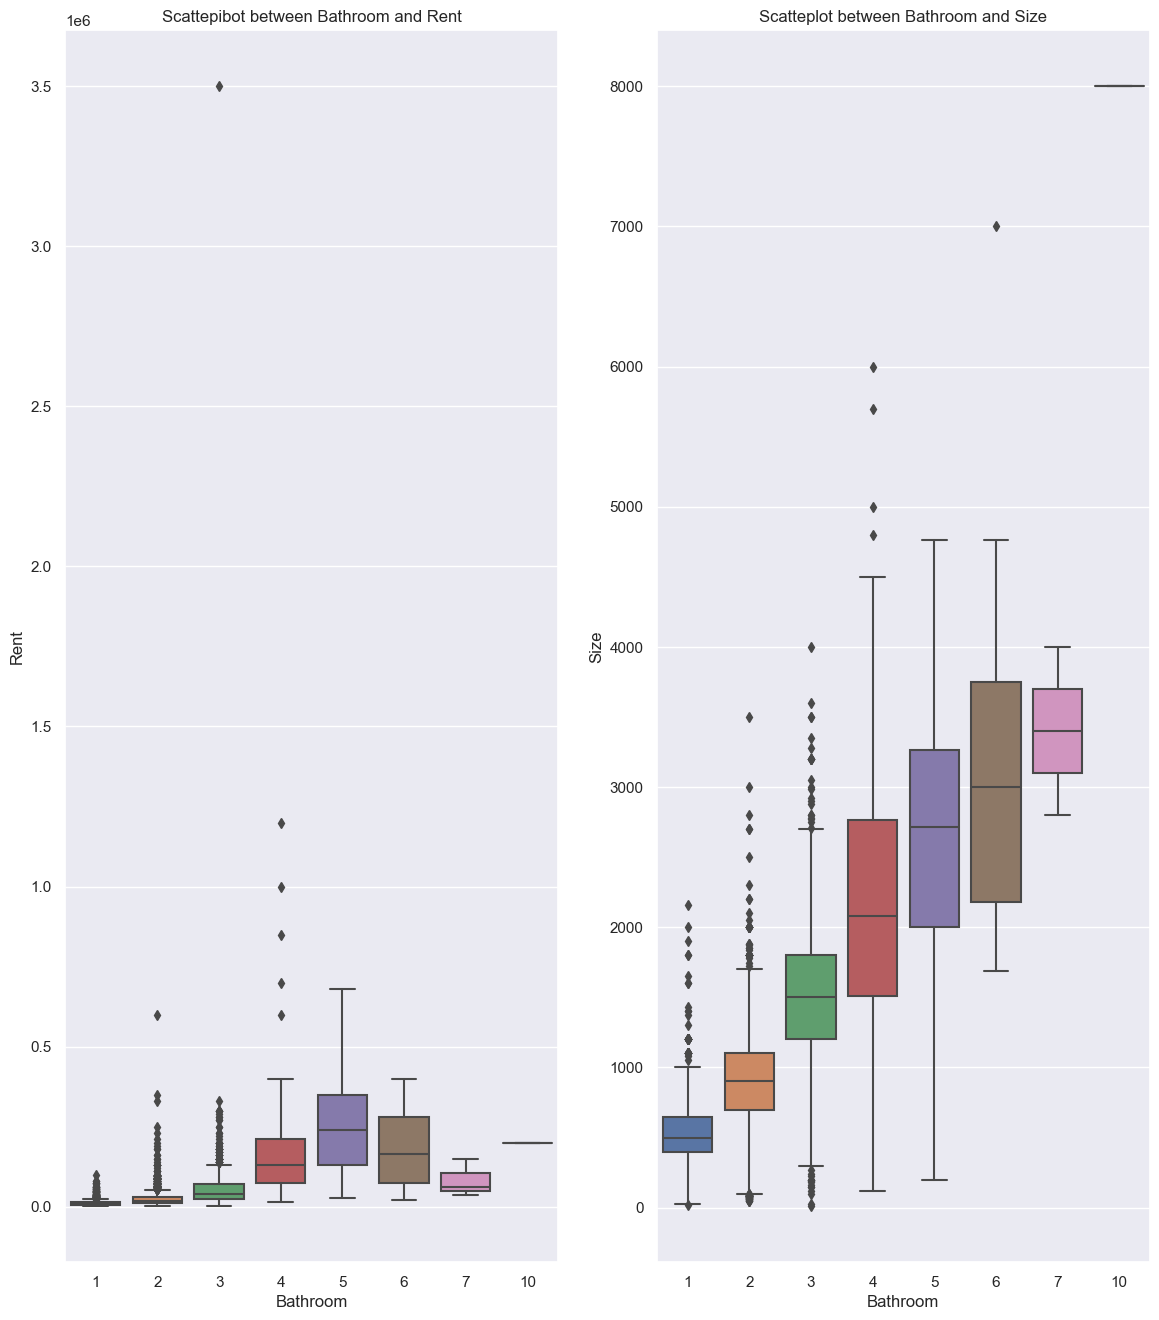

In [28]:
# Relationship between Bathroom and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'Bathroom', y = 'Rent', data = df_rent)
plt.title('Scattepibot between Bathroom and Rent')


# Relationship between Bathroom and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'Bathroom', y = 'Size', data = df_rent)
plt.title('Scatteplot between Bathroom and Size')

plt.show()

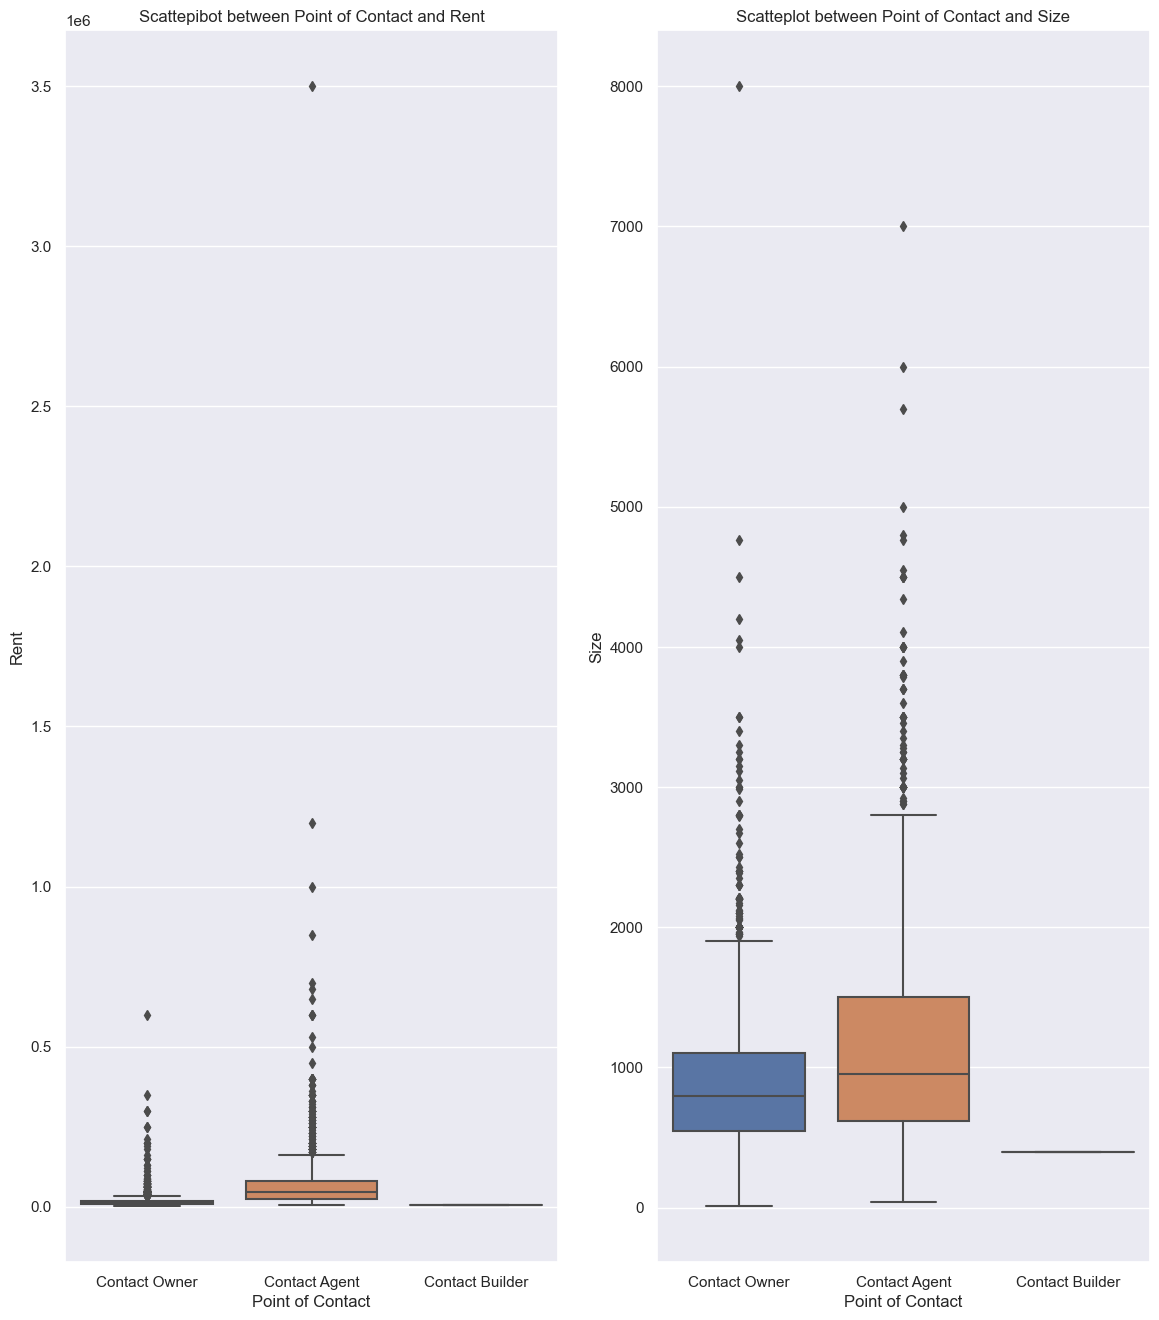

In [29]:
# Relationship between Point of Contact and Rent
plt.rcParams['figure.figsize'] = [14,16]
plt.subplot(1,2,1)
sns.boxplot(x = 'Point of Contact', y = 'Rent', data = df_rent)
plt.title('Scattepibot between Point of Contact and Rent')


# Relationship between Point of Contact and Size
plt.subplot(1,2,2)
sns.boxplot(x = 'Point of Contact', y = 'Size', data = df_rent)
plt.title('Scatteplot between Point of Contact and Size')

plt.show()

#### Insights :

- It can be noticed from BHK vs Rent plot that the quantiles of houses of 3BHK and 6BHk are almost equal. Thereby hinting that the prices might be similar even due to increase in number of rooms which can be a steal for some if this was considered.
- In BHK vs Size plot, as expected, the size of the house increases as BHK number increases.
- In Area Type vs Rent plot, Carpet Area category has higher standard deviation as compared to Super Area.And rent price also higher.
- In Area Type vs Size plot, the size for Carpet Area Category and Super Area Category are almost identical in terms of statistical properties. Due to presence of less instaces in Built Area type, there are no outliers as in other categories.
- In Cities vs Rent plot, it can be seen that Mumbai has the highest median house price, then followed by Delhi. 
- In Cities vs Size plot, the median sizes for houses in Hyderabad, Bangalore, Chennai are higher.
- In Furnishing Type vs Rent plot, rent prices for Semi Furnished houses has a higher standard deviation, hinting that semi furnished houses are are present in both mid and lower price ranges.
- In Furnishing Type vs Size plot, size for both Semi furnished and furnished are usually similar with high outliers present in Semi furnished category.
- In Tenant Type vs Rent plot, the standard deviation of rent prices for only bachelors is higher.
- In Tenant Type vs Size plot, it is can be interpreted that median house size in decreses order are just Family, just Bachelors and then Family/Bachelors. This hypothesis can be confirmed by the fact that just families usually have a high member count usually and hence require a larger house.
- In Bathroom vs Rent plot, a weird trend can be observed that if first median rent increases with increase in number of bathroom then decresases.
- In Bathroom vs Size plot, an evident trend can be observed that increase in number of bathroom increases size of the house.
- In Point of Contact vs Rent Prices plot, it can be seen that the median house price for contacting with Agent is almost three times as that of contacting with owner. This can be explained by the fact that Agents usually take commission.
- In Point of Contact vs Size plot, it can be seen that in lower priced houses, it is preferred to contact owner rather than agent as owner want to prevent agent from taking commission.


### Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
train_dataframe, test_dataframe = train_test_split(df_rent, test_size = 0.2, random_state = 42, shuffle = True)

### Feature Engineering

In [31]:
# Drop the Area Locality feature as we wont be using it.

train_dataframe.drop(['Area Locality'], axis =1, inplace =True)
test_dataframe.drop(['Area Locality'], axis =1, inplace =True)

In [32]:
# Splitting Floor feature into Renting Floor and Total Floor in train and test dataset

train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "3"].index, axis = 0, inplace=True)
train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "1"].index, axis = 0, inplace=True)
train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "Ground"].index, axis = 0, inplace=True)

train_dataframe["Renting Floor"] = [x.split(" out of ")[0] for x in train_dataframe["Floor"].values]
train_dataframe["Total Floor"] = [x.split(" out of ")[1] for x in train_dataframe["Floor"].values]
train_dataframe.loc[train_dataframe["Renting Floor"] == "Ground", "Renting Floor"] = "0"
train_dataframe.loc[train_dataframe["Renting Floor"] == "Upper Basement", "Renting Floor"]= "-1"
train_dataframe.loc[train_dataframe["Renting Floor"] == "Lower Basement", "Renting Floor"] = "-2"


test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "3"].index, axis = 0, inplace=True)
test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "1"].index, axis = 0, inplace=True)
test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "Ground"].index, axis = 0, inplace=True)

test_dataframe["Renting Floor"] = [x.split(" out of ")[0] for x in test_dataframe["Floor"].values]
test_dataframe["Total Floor"] = [x.split(" out of ")[1] for x in test_dataframe["Floor"].values]
test_dataframe.loc[test_dataframe["Renting Floor"] == "Ground", "Renting Floor"] = "0"
test_dataframe.loc[test_dataframe["Renting Floor"] == "Upper Basement", "Renting Floor"]= "-1"
test_dataframe.loc[test_dataframe["Renting Floor"] == "Lower Basement", "Renting Floor"] = "-2"

In [33]:
# Converting the datatype of Renting Floor and Total Floor to int.

train_dataframe["Renting Floor"] = train_dataframe["Renting Floor"].astype(int)
train_dataframe["Total Floor"] = train_dataframe["Total Floor"].astype(int)

test_dataframe["Renting Floor"] = test_dataframe["Renting Floor"].astype(int)
test_dataframe["Total Floor"] = test_dataframe["Total Floor"].astype(int)

In [34]:
# Removing Floor feature

train_dataframe.drop(axis = 1, labels="Floor", inplace=True)
test_dataframe.drop(axis = 1, labels="Floor", inplace=True)

In [35]:
# Splitting Posted On feature into Posted Month and Posted Date

train_dataframe["Posted Month"] = [x.split("-")[1] for x in train_dataframe["Posted On"].values]
train_dataframe["Posted Date"] = [x.split("-")[2] for x in train_dataframe["Posted On"].values]

test_dataframe["Posted Month"] = [x.split("-")[1] for x in test_dataframe["Posted On"].values]
test_dataframe["Posted Date"] = [x.split("-")[2] for x in test_dataframe["Posted On"].values]

In [36]:
# Converting datatype of Posted Month and Posted Date into int.

train_dataframe["Posted Month"] = train_dataframe["Posted Month"].astype(int)
train_dataframe["Posted Date"] = train_dataframe["Posted Date"].astype(int)

test_dataframe["Posted Month"] = test_dataframe["Posted Month"].astype(int)
test_dataframe["Posted Date"] = test_dataframe["Posted Date"].astype(int)

In [37]:
# Droping Posted On

train_dataframe.drop(axis = 1, labels="Posted On", inplace=True)
test_dataframe.drop(axis = 1, labels="Posted On", inplace=True)

In [38]:
# Creating X_train, X_test, y_train, y_test

X_train = train_dataframe.loc[:, ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Renting Floor', 'Total Floor', 'Posted Month', 'Posted Date']]
y_train = train_dataframe.loc[:, ["Rent"]]

X_test = test_dataframe.loc[:, ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Renting Floor', 'Total Floor', 'Posted Month', 'Posted Date']]
y_test = test_dataframe.loc[:, ["Rent"]]

In [41]:
# One Hot encoding on categorical columns and feature scaling in size using standardscaler

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


columntrans = ColumnTransformer(transformers=[("cat", OneHotEncoder(sparse=False), ["Area Type", "City", "Furnishing Status", "Tenant Preferred", "Point of Contact"]),("scaler", StandardScaler(), ["Size"])], remainder="passthrough")
X_train = columntrans.fit_transform(X_train)
X_test = columntrans.transform(X_test)
y_train = y_train.values
y_test = y_test.values


### Modeling

In [47]:
# modeling dataset using SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = SVR()
model.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

C:\Brocamp\Jupyter\jupyter_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83615.99697245329

In [48]:
# Evaluating

np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

65667.82840884615